**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-773bc05a73a7>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


**Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

**Load DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/dataset/GB1.xlsx")
df

,pIC50,ATS0m,ATS1m,ATS7s,AATS7i,AATS6s,ATSC1v,ATSC4e,ATSC6e,ATSC8p,...,gmax,MAXDN2,DELS2,CIC3,ZMIC0,ZMIC4,R_TpiPCTPC,VE2_DzZ,WTPT-4,WTPT-5
0,4.004892,3185.729309,2876.088125,94.981481,166.464741,4.621914,71.938963,0.790884,-0.722782,1.107964,...,11.242068,1.982543,16.024552,0.512138,44.260677,25.360502,10.926349,0.015329,5.042900,2.956971
1,3.420102,3331.009494,3030.447366,97.407407,164.300900,4.712840,26.852058,1.005955,-0.718585,-3.396336,...,11.253449,2.105949,16.646313,0.641517,47.254891,25.856476,11.644937,0.016409,5.043334,2.957234
2,3.468904,3545.652569,3092.170858,107.462963,170.816519,5.367541,70.191152,0.121759,-1.366755,1.100058,...,12.598186,2.074699,25.157842,0.380952,45.543176,27.033765,11.062948,0.013565,5.043334,2.957234
3,3.806041,9569.362461,3823.707981,91.409294,164.433976,4.596965,67.830835,0.526226,-0.989564,0.552069,...,11.320550,1.992668,17.373672,0.380952,50.981283,32.471873,11.062948,0.010035,5.043334,2.957234
4,4.070837,5697.102181,3703.453849,94.824874,164.843326,4.677898,66.299806,0.286331,-0.355965,1.243235,...,11.441736,2.068503,23.325805,0.095238,54.011827,30.458678,10.919686,0.006360,5.042973,2.957015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,5.044312,6668.470331,6404.219041,257.676269,162.696095,3.925189,19.173342,-0.883178,-2.205005,-0.351332,...,12.568928,2.461531,38.210929,0.400000,92.291657,32.658629,10.884857,0.007941,10.576771,15.981493
103,4.274088,7187.420373,6616.618562,325.254973,163.238424,4.543911,11.922074,-2.128407,-2.929385,7.257542,...,13.128945,5.723588,52.716859,0.427068,91.050482,35.028501,10.499625,0.006067,5.738924,12.946934
104,6.677781,6999.719454,6898.282224,326.491084,163.845764,3.592194,30.358405,1.636464,0.775685,1.701283,...,12.791240,1.813223,33.818900,0.669996,103.200397,31.363083,10.070914,0.008351,8.315470,16.218559
105,4.486782,7924.156767,6817.901903,285.050754,160.872434,4.201023,16.464510,-0.076023,-2.560725,0.581452,...,12.661933,2.559977,43.216653,0.200000,93.919425,32.462051,10.629123,0.003959,10.576758,15.982096


In [ ]:
print(df.columns)

Index(['pIC50', 'ATS0m', 'ATS1m', 'ATS7s', 'AATS7i', 'AATS6s', 'ATSC1v',
       'ATSC4e', 'ATSC6e', 'ATSC8p', 'ATSC8s', 'AATSC0c', 'AATSC7m', 'AATSC4v',
       'AATSC5e', 'AATSC5s', 'MATS1m', 'MATS2m', 'MATS4m', 'MATS1e', 'MATS7p',
       'GATS2c', 'GATS2m', 'GATS8e', 'GATS1p', 'GATS2p', 'GATS4i', 'VR3_Dzm',
       'VR3_Dzp', 'VE1_Dzi', 'SpAbs_Dzs', 'SpMax1_Bhv', 'SpMax1_Bhp',
       'SpMax6_Bhi', 'SpMin1_Bhi', 'SpMin2_Bhi', 'SpMin4_Bhs', 'CrippenMR',
       'minHCsats', 'minsOm', 'maxsCl', 'gmax', 'MAXDN2', 'DELS2', 'CIC3',
       'ZMIC0', 'ZMIC4', 'R_TpiPCTPC', 'VE2_DzZ', 'WTPT-4', 'WTPT-5'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pIC50       107 non-null    float64
 1   ATS0m       107 non-null    float64
 2   ATS1m       107 non-null    float64
 3   ATS7s       107 non-null    float64
 4   AATS7i      107 non-null    float64
 5   AATS6s      107 non-null    float64
 6   ATSC1v      107 non-null    float64
 7   ATSC4e      107 non-null    float64
 8   ATSC6e      107 non-null    float64
 9   ATSC8p      107 non-null    float64
 10  ATSC8s      107 non-null    float64
 11  AATSC0c     107 non-null    float64
 12  AATSC7m     107 non-null    float64
 13  AATSC4v     107 non-null    float64
 14  AATSC5e     107 non-null    float64
 15  AATSC5s     107 non-null    float64
 16  MATS1m      107 non-null    float64
 17  MATS2m      107 non-null    float64
 18  MATS4m      107 non-null    float64
 19  MATS1e      107 non-null    f

**Checking for Null Values**

In [ ]:
df.isnull()

,pIC50,ATS0m,ATS1m,ATS7s,AATS7i,AATS6s,ATSC1v,ATSC4e,ATSC6e,ATSC8p,...,gmax,MAXDN2,DELS2,CIC3,ZMIC0,ZMIC4,R_TpiPCTPC,VE2_DzZ,WTPT-4,WTPT-5
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

pIC50         0
ATS0m         0
ATS1m         0
ATS7s         0
AATS7i        0
AATS6s        0
ATSC1v        0
ATSC4e        0
ATSC6e        0
ATSC8p        0
ATSC8s        0
AATSC0c       0
AATSC7m       0
AATSC4v       0
AATSC5e       0
AATSC5s       0
MATS1m        0
MATS2m        0
MATS4m        0
MATS1e        0
MATS7p        0
GATS2c        0
GATS2m        0
GATS8e        0
GATS1p        0
GATS2p        0
GATS4i        0
VR3_Dzm       0
VR3_Dzp       0
VE1_Dzi       0
SpAbs_Dzs     0
SpMax1_Bhv    0
SpMax1_Bhp    0
SpMax6_Bhi    0
SpMin1_Bhi    0
SpMin2_Bhi    0
SpMin4_Bhs    0
CrippenMR     0
minHCsats     0
minsOm        0
maxsCl        0
gmax          0
MAXDN2        0
DELS2         0
CIC3          0
ZMIC0         0
ZMIC4         0
R_TpiPCTPC    0
VE2_DzZ       0
WTPT-4        0
WTPT-5        0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df2 = df.fillna(value = 0) 
df2

,pIC50,ATS0m,ATS1m,ATS7s,AATS7i,AATS6s,ATSC1v,ATSC4e,ATSC6e,ATSC8p,...,gmax,MAXDN2,DELS2,CIC3,ZMIC0,ZMIC4,R_TpiPCTPC,VE2_DzZ,WTPT-4,WTPT-5
0,4.004892,3185.729309,2876.088125,94.981481,166.464741,4.621914,71.938963,0.790884,-0.722782,1.107964,...,11.242068,1.982543,16.024552,0.512138,44.260677,25.360502,10.926349,0.015329,5.042900,2.956971
1,3.420102,3331.009494,3030.447366,97.407407,164.300900,4.712840,26.852058,1.005955,-0.718585,-3.396336,...,11.253449,2.105949,16.646313,0.641517,47.254891,25.856476,11.644937,0.016409,5.043334,2.957234
2,3.468904,3545.652569,3092.170858,107.462963,170.816519,5.367541,70.191152,0.121759,-1.366755,1.100058,...,12.598186,2.074699,25.157842,0.380952,45.543176,27.033765,11.062948,0.013565,5.043334,2.957234
3,3.806041,9569.362461,3823.707981,91.409294,164.433976,4.596965,67.830835,0.526226,-0.989564,0.552069,...,11.320550,1.992668,17.373672,0.380952,50.981283,32.471873,11.062948,0.010035,5.043334,2.957234
4,4.070837,5697.102181,3703.453849,94.824874,164.843326,4.677898,66.299806,0.286331,-0.355965,1.243235,...,11.441736,2.068503,23.325805,0.095238,54.011827,30.458678,10.919686,0.006360,5.042973,2.957015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,5.044312,6668.470331,6404.219041,257.676269,162.696095,3.925189,19.173342,-0.883178,-2.205005,-0.351332,...,12.568928,2.461531,38.210929,0.400000,92.291657,32.658629,10.884857,0.007941,10.576771,15.981493
103,4.274088,7187.420373,6616.618562,325.254973,163.238424,4.543911,11.922074,-2.128407,-2.929385,7.257542,...,13.128945,5.723588,52.716859,0.427068,91.050482,35.028501,10.499625,0.006067,5.738924,12.946934
104,6.677781,6999.719454,6898.282224,326.491084,163.845764,3.592194,30.358405,1.636464,0.775685,1.701283,...,12.791240,1.813223,33.818900,0.669996,103.200397,31.363083,10.070914,0.008351,8.315470,16.218559
105,4.486782,7924.156767,6817.901903,285.050754,160.872434,4.201023,16.464510,-0.076023,-2.560725,0.581452,...,12.661933,2.559977,43.216653,0.200000,93.919425,32.462051,10.629123,0.003959,10.576758,15.982096


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pIC50       107 non-null    float64
 1   ATS0m       107 non-null    float64
 2   ATS1m       107 non-null    float64
 3   ATS7s       107 non-null    float64
 4   AATS7i      107 non-null    float64
 5   AATS6s      107 non-null    float64
 6   ATSC1v      107 non-null    float64
 7   ATSC4e      107 non-null    float64
 8   ATSC6e      107 non-null    float64
 9   ATSC8p      107 non-null    float64
 10  ATSC8s      107 non-null    float64
 11  AATSC0c     107 non-null    float64
 12  AATSC7m     107 non-null    float64
 13  AATSC4v     107 non-null    float64
 14  AATSC5e     107 non-null    float64
 15  AATSC5s     107 non-null    float64
 16  MATS1m      107 non-null    float64
 17  MATS2m      107 non-null    float64
 18  MATS4m      107 non-null    float64
 19  MATS1e      107 non-null    f

In [ ]:
df2.describe()

,pIC50,ATS0m,ATS1m,ATS7s,AATS7i,AATS6s,ATSC1v,ATSC4e,ATSC6e,ATSC8p,...,gmax,MAXDN2,DELS2,CIC3,ZMIC0,ZMIC4,R_TpiPCTPC,VE2_DzZ,WTPT-4,WTPT-5
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,4.216168,7243.575461,6234.727661,310.913718,157.816515,3.854308,37.949726,-0.510502,-0.601715,0.245716,...,12.884221,2.162480,37.310848,0.512838,92.696972,31.102929,9.967638,0.003696,7.933900,10.779435
std,0.725320,2208.805438,1044.079076,100.751647,3.901566,0.753687,45.172733,0.867707,1.109061,3.319942,...,0.511464,0.447249,12.821812,0.197623,17.135487,2.639669,4.189731,0.003740,3.181028,3.829500
min,3.301030,3185.729309,2876.088125,91.409294,149.615557,2.476923,-123.917482,-2.677826,-2.929385,-6.857002,...,11.242068,1.578398,15.912578,0.095238,44.260677,25.184885,4.830305,0.000020,2.569766,2.956971
25%,3.733644,6421.863532,6107.226594,269.070988,154.943955,3.151098,19.840302,-1.005605,-1.439028,-1.696777,...,12.669044,1.934077,28.434539,0.376642,87.208262,29.515366,7.719470,0.000764,5.351249,9.619914
50%,4.069153,6991.693552,6452.373994,316.356081,157.922869,3.776587,52.776644,-0.574510,-0.727433,0.508216,...,12.794758,2.077710,36.233705,0.525163,93.444007,31.069216,8.808830,0.002111,7.688486,9.756093
75%,4.489463,7607.115586,6851.082900,364.388889,160.613746,4.283832,69.855497,0.078184,0.110509,2.975239,...,13.183281,2.453770,43.467081,0.639631,104.668476,32.743388,10.695948,0.005974,10.464094,13.277854
max,6.677781,21469.670680,7595.218400,583.824074,170.816519,6.013696,110.786779,1.929749,1.860468,8.394998,...,13.864402,5.723588,77.027605,1.125815,124.223266,37.849960,19.744189,0.016409,18.900883,19.039379


In [ ]:
scale = StandardScaler()
df2_sc = scale.fit_transform(df2)
df2_sc = pd.DataFrame(df2_sc, columns = df2.columns)

In [ ]:
df2_sc.head()

,pIC50,ATS0m,ATS1m,ATS7s,AATS7i,AATS6s,ATSC1v,ATSC4e,ATSC6e,ATSC8p,...,gmax,MAXDN2,DELS2,CIC3,ZMIC0,ZMIC4,R_TpiPCTPC,VE2_DzZ,WTPT-4,WTPT-5
0,-0.292658,-1.845768,-3.231982,-2.153299,2.227035,1.023261,0.755969,1.506856,-0.109675,0.260940,...,-3.225805,-0.404213,-1.667975,-0.003561,-2.839968,-2.185672,0.229901,3.125541,-0.913103,-2.052298
1,-1.102702,-1.779685,-3.083444,-2.129107,1.669817,1.144470,-0.246828,1.755883,-0.105873,-1.102185,...,-3.203448,-0.126993,-1.619255,0.654197,-2.664408,-1.996895,0.402220,3.415505,-0.912966,-2.052229
2,-1.035102,-1.682052,-3.024048,-2.028832,3.347677,2.017223,0.717095,0.732085,-0.693055,0.258547,...,-0.561881,-0.197193,-0.952299,-0.670499,-2.764771,-1.548797,0.262658,2.651382,-0.912966,-2.052229
3,-0.568104,1.057917,-2.320098,-2.188921,1.704086,0.990003,0.664598,1.200413,-0.351355,0.092711,...,-3.071636,-0.381469,-1.562260,-0.670499,-2.445918,0.521045,0.262658,1.703052,-0.912966,-2.052229
4,-0.201312,-0.703435,-2.435817,-2.154860,1.809499,1.097891,0.630546,0.922641,0.222627,0.301877,...,-2.833581,-0.211112,-1.095856,-2.123055,-2.268228,-0.245213,0.228303,0.715642,-0.913080,-2.052287


In [ ]:
df2_sc.describe()

,pIC50,ATS0m,ATS1m,ATS7s,AATS7i,AATS6s,ATSC1v,ATSC4e,ATSC6e,ATSC8p,...,gmax,MAXDN2,DELS2,CIC3,ZMIC0,ZMIC4,R_TpiPCTPC,VE2_DzZ,WTPT-4,WTPT-5
count,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,...,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02
mean,5.260589e-16,-4.741794e-16,1.396598e-15,-8.819529e-17,-3.218609e-15,-2.728866e-16,-6.848105e-17,2.282702e-17,-1.120599e-16,-6.225550e-18,...,3.579691e-15,3.839089e-16,4.202246e-16,-8.425244e-16,-5.462920e-16,-2.114612e-15,1.426688e-16,-1.136163e-16,-4.046607e-16,3.569315e-16
std,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,...,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00
min,-1.267640e+00,-1.845768e+00,-3.231982e+00,-2.188921e+00,-2.111858e+00,-1.836129e+00,-3.600157e+00,-2.509514e+00,-2.108652e+00,-2.149478e+00,...,-3.225805e+00,-1.312090e+00,-1.676750e+00,-2.123055e+00,-2.839968e+00,-2.252514e+00,-1.231943e+00,-9.876151e-01,-1.694225e+00,-2.052298e+00
25%,-6.683871e-01,-3.737671e-01,-1.226929e-01,-4.172601e-01,-7.397231e-01,-9.374169e-01,-4.027794e-01,-5.732726e-01,-7.585270e-01,-5.878518e-01,...,-4.226900e-01,-5.130879e-01,-6.955398e-01,-6.924146e-01,-3.218198e-01,-6.042550e-01,-5.391152e-01,-7.879375e-01,-8.157130e-01,-3.042115e-01
50%,-2.036441e-01,-1.145720e-01,2.094387e-01,5.427182e-02,2.738743e-02,-1.036067e-01,3.297718e-01,-7.411430e-02,-1.138882e-01,7.943964e-02,...,-1.757397e-01,-1.904288e-01,-8.440397e-02,6.265992e-02,4.380099e-02,-1.283153e-02,-2.778845e-01,-4.259382e-01,-7.751249e-02,-2.684837e-01
75%,3.785654e-01,1.653613e-01,5.931119e-01,5.332600e-01,7.203246e-01,5.725793e-01,7.096298e-01,6.816311e-01,6.452089e-01,8.260289e-01,...,5.874648e-01,6.543575e-01,4.823969e-01,6.446077e-01,7.019259e-01,6.243885e-01,1.746502e-01,6.119473e-01,7.991444e-01,6.554840e-01
max,3.409799e+00,6.470937e+00,1.309185e+00,2.721490e+00,3.347677e+00,2.878583e+00,1.620000e+00,2.825531e+00,2.230508e+00,2.466197e+00,...,1.925442e+00,7.999726e+00,3.112170e+00,3.116342e+00,1.848483e+00,2.568042e+00,2.344437e+00,3.415505e+00,3.463847e+00,2.167075e+00


**Input and Output Preparation**

In [ ]:
X = df2_sc.drop(['pIC50'],axis = 1)
X

,ATS0m,ATS1m,ATS7s,AATS7i,AATS6s,ATSC1v,ATSC4e,ATSC6e,ATSC8p,ATSC8s,...,gmax,MAXDN2,DELS2,CIC3,ZMIC0,ZMIC4,R_TpiPCTPC,VE2_DzZ,WTPT-4,WTPT-5
0,-1.845768,-3.231982,-2.153299,2.227035,1.023261,0.755969,1.506856,-0.109675,0.260940,-0.576716,...,-3.225805,-0.404213,-1.667975,-0.003561,-2.839968,-2.185672,0.229901,3.125541,-0.913103,-2.052298
1,-1.779685,-3.083444,-2.129107,1.669817,1.144470,-0.246828,1.755883,-0.105873,-1.102185,-0.178432,...,-3.203448,-0.126993,-1.619255,0.654197,-2.664408,-1.996895,0.402220,3.415505,-0.912966,-2.052229
2,-1.682052,-3.024048,-2.028832,3.347677,2.017223,0.717095,0.732085,-0.693055,0.258547,0.885683,...,-0.561881,-0.197193,-0.952299,-0.670499,-2.764771,-1.548797,0.262658,2.651382,-0.912966,-2.052229
3,1.057917,-2.320098,-2.188921,1.704086,0.990003,0.664598,1.200413,-0.351355,0.092711,-0.626263,...,-3.071636,-0.381469,-1.562260,-0.670499,-2.445918,0.521045,0.262658,1.703052,-0.912966,-2.052229
4,-0.703435,-2.435817,-2.154860,1.809499,1.097891,0.630546,0.922641,0.222627,0.301877,-0.552233,...,-2.833581,-0.211112,-1.095856,-2.123055,-2.268228,-0.245213,0.228303,0.715642,-0.913080,-2.052287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,-0.261595,0.163100,-0.530889,1.256558,0.094488,-0.417614,-0.431517,-1.452431,-0.180683,-0.661615,...,-0.619355,0.671792,0.070530,-0.573662,-0.023765,0.592128,0.219951,1.140572,0.834733,1.364810
103,-0.025543,0.367489,0.143012,1.396215,0.919279,-0.578892,-1.873350,-2.108652,2.121971,4.449638,...,0.480728,7.999726,1.207201,-0.436051,-0.096539,1.494144,0.127572,0.637062,-0.693268,0.568664
104,-0.110921,0.638531,0.155339,1.552613,-0.349412,-0.168842,2.485941,1.247796,0.440494,0.454109,...,-0.182651,-0.784577,-0.273626,0.798982,0.615848,0.099020,0.024766,1.250748,0.120516,1.427006
105,0.309572,0.561182,-0.257908,0.786940,0.462190,-0.477862,0.503077,-1.774680,0.101603,2.911708,...,-0.436657,0.892942,0.462774,-1.590451,0.071676,0.517306,0.158626,0.070534,0.834729,1.364968


In [ ]:
Y = df2_sc.pIC50
Y

0     -0.292658
1     -1.102702
2     -1.035102
3     -0.568104
4     -0.201312
         ...   
102    1.147136
103    0.080230
104    3.409799
105    0.374852
106    0.978083
Name: pIC50, Length: 107, dtype: float64

In [ ]:
X.shape

(107, 50)

In [ ]:
Y.shape

(107,)

In [ ]:
corr = X.corr()

In [ ]:
corr

,ATS0m,ATS1m,ATS7s,AATS7i,AATS6s,ATSC1v,ATSC4e,ATSC6e,ATSC8p,ATSC8s,...,gmax,MAXDN2,DELS2,CIC3,ZMIC0,ZMIC4,R_TpiPCTPC,VE2_DzZ,WTPT-4,WTPT-5
ATS0m,1.000000,0.456224,0.121529,-0.301528,-0.164230,0.099425,-0.049271,-0.033185,0.017362,-0.115894,...,0.102881,-0.025333,0.054200,-0.045759,0.241204,0.652606,-0.021330,-0.185579,-0.065645,0.155599
ATS1m,0.456224,1.000000,0.813814,-0.247177,-0.378282,-0.036911,-0.401179,0.228263,0.155862,-0.011368,...,0.631978,0.174219,0.443233,0.147930,0.943099,0.483182,0.007039,-0.386448,0.392004,0.764767
ATS7s,0.121529,0.813814,1.000000,0.016420,-0.231192,-0.112094,-0.350777,0.156787,0.277655,-0.081195,...,0.691954,0.215809,0.566414,0.187412,0.891264,0.179851,-0.087268,-0.282334,0.495323,0.544172
AATS7i,-0.301528,-0.247177,0.016420,1.000000,0.234712,-0.193053,0.165577,-0.311851,0.539817,0.246513,...,0.017600,0.122455,0.122821,-0.301490,-0.177044,-0.503187,-0.539233,0.100203,0.127393,-0.143192
AATS6s,-0.164230,-0.378282,-0.231192,0.234712,1.000000,-0.016810,0.054225,-0.352009,0.059012,0.057019,...,0.035812,0.471160,0.566632,-0.682057,-0.460245,-0.015446,0.089713,0.019460,0.238067,-0.362953
ATSC1v,0.099425,-0.036911,-0.112094,-0.193053,-0.016810,1.000000,0.260973,0.066644,0.002019,-0.308385,...,-0.039087,-0.029020,-0.118045,0.091226,-0.130672,0.158917,0.093021,-0.004096,-0.542915,-0.083083
ATSC4e,-0.049271,-0.401179,-0.350777,0.165577,0.054225,0.260973,1.000000,-0.375455,0.014199,-0.067415,...,-0.180446,-0.307250,-0.212691,-0.023862,-0.454734,-0.212094,-0.299992,0.097334,-0.414846,-0.500424
ATSC6e,-0.033185,0.228263,0.156787,-0.311851,-0.352009,0.066644,-0.375455,1.000000,-0.423669,-0.302667,...,0.043027,-0.234944,-0.259696,0.417926,0.348709,0.041722,0.547784,0.309248,-0.081640,0.400951
ATSC8p,0.017362,0.155862,0.277655,0.539817,0.059012,0.002019,0.014199,-0.423669,1.000000,0.183423,...,0.280432,0.178470,0.305565,-0.348854,0.141829,-0.270235,-0.716996,-0.495123,0.137367,-0.098149
ATSC8s,-0.115894,-0.011368,-0.081195,0.246513,0.057019,-0.308385,-0.067415,-0.302667,0.183423,1.000000,...,0.101541,0.329137,0.086861,-0.123043,-0.056112,-0.011146,-0.083856,-0.108440,0.137503,0.094037


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,ATS0m,ATS1m,ATS7s,AATS7i,AATS6s,ATSC1v,ATSC4e,ATSC6e,ATSC8p,ATSC8s,AATSC0c,AATSC7m,AATSC4v,AATSC5e,AATSC5s,MATS1m,MATS2m,MATS4m,MATS1e,MATS7p,GATS2c,GATS2m,GATS8e,GATS1p,GATS2p,GATS4i,VR3_Dzm,VR3_Dzp,VE1_Dzi,SpAbs_Dzs,SpMax1_Bhv,SpMax1_Bhp,SpMax6_Bhi,SpMin1_Bhi,SpMin2_Bhi,SpMin4_Bhs,CrippenMR,minHCsats,minsOm,maxsCl,gmax,MAXDN2,DELS2,CIC3,ZMIC0,ZMIC4,R_TpiPCTPC,VE2_DzZ,WTPT-4,WTPT-5
ATS0m,1.000000,0.456224,0.121529,-0.301528,-0.164230,0.099425,-0.049271,-0.033185,0.017362,-0.115894,-0.119603,0.369744,-0.141680,0.094955,0.091337,-0.402073,-0.275527,-0.231640,0.061672,0.223689,0.041070,-0.247439,-0.080726,-0.382978,-0.223036,0.324233,0.182887,0.206372,-0.004893,0.222077,0.040124,0.205516,0.155965,0.038813,0.239620,0.247932,0.300292,-0.019475,0.040870,0.163835,0.102881,-0.025333,0.054200,-0.045759,0.241204,0.652606,-0.021330,-0.185579,-0.065645,0.155599
ATS1m,0.456224,1.000000,0.813814,-0.247177,-0.378282,-0.036911,-0.401179,0.228263,0.155862,-0.011368,-0.130008,0.009107,-0.223991,0.246564,0.015735,0.206548,-0.184658,-0.286749,0.279268,-0.019739,0.551884,0.193277,-0.389737,0.315129,0.095289,0.399576,0.902037,0.910720,0.408818,0.884994,0.319508,0.004476,0.892131,-0.018342,0.699710,0.838240,0.946826,0.337565,0.239887,0.039944,0.631978,0.174219,0.443233,0.147930,0.943099,0.483182,0.007039,-0.386448,0.392004,0.764767
ATS7s,0.121529,0.813814,1.000000,0.016420,-0.231192,-0.112094,-0.350777,0.156787,0.277655,-0.081195,0.011387,-0.147168,-0.162348,0.283514,-0.031014,0.289010,0.046244,-0.150976,0.116053,-0.210830,0.447184,0.231649,-0.325184,0.576304,0.114121,0.135764,0.848007,0.821218,0.530076,0.854194,0.244968,-0.152036,0.841040,-0.005221,0.536946,0.681730,0.831581,0.487772,0.129277,-0.130640,0.691954,0.215809,0.566414,0.187412,0.891264,0.179851,-0.087268,-0.282334,0.495323,0.544172
AATS7i,-0.301528,-0.247177,0.016420,1.000000,0.234712,-0.193053,0.165577,-0.311851,0.539817,0.246513,0.409027,0.046351,0.055427,-0.019035,-0.015582,0.054643,-0.057835,0.071916,-0.316933,0.261143,0.000382,0.340260,0.226381,0.305051,0.279840,-0.269429,-0.194856,-0.376055,-0.039944,-0.123344,-0.362330,-0.381515,-0.183424,-0.526432,-0.400736,-0.558666,-0.295635,0.342835,-0.232001,-0.234361,0.017600,0.122455,0.122821,-0.301490,-0.177044,-0.503187,-0.539233,0.100203,0.127393,-0.143192
AATS6s,-0.164230,-0.378282,-0.231192,0.234712,1.000000,-0.016810,0.054225,-0.352009,0.059012,0.057019,0.799575,0.256418,-0.177861,0.087759,0.144563,-0.624493,0.337318,-0.117394,-0.377122,-0.005203,-0.643881,-0.568552,-0.097522,-0.354461,-0.460102,-0.439270,-0.357136,-0.403789,-0.511142,-0.568541,0.082514,0.382547,-0.409556,0.107736,-0.102430,-0.348228,-0.535066,-0.437078,0.077511,0.121702,0.035812,0.471160,0.566632,-0.682057,-0.460245,-0.015446,0.089713,0.019460,0.238067,-0.362953
ATSC1v,0.099425,-0.036911,-0.112094,-0.193053,-0.016810,1.000000,0.260973,0.066644,0.002019,-0.308385,-0.264135,0.109891,0.236924,0.342572,0.308526,-0.207319,-0.059575,0.422020,0.024219,0.134395,-0.407845,0.008770,0.413340,-0.559774,0.269250,0.222819,-0.091288,-0.060553,-0.098181,0.026307,0.177486,0.213491,-0.118036,0.184317,0.048663,0.060640,-0.041521,-0.349572,0.107310,0.087658,-0.039087,-0.029020,-0.118045,0.091226,-0.130672,0.158917,0.093021,-0.004096,-0.542915,-0.083083
ATSC4e,-0.049271,-0.401179,-0.350777,0.165577,0.054225,0.260973,1.000000,-0.375455,0.014199,-0.067415,0.090909,0.075490,-0.015243,0.322068,0.437455,-0.200607,0.269189,0.687133,-0.427685,0.205340,-0.420366,-0.093777,0.408072,-0.264509,-0.052526,0.267776,-0.457910,-0.474186,-0.423846,-0.404649,-0.370867,-0.013124,-0.462688,-0.032796,-0.248607,-0.386833,-0.432718,-0.103087,-0.435267,-0.023369,-0.180446,-0.307250,-0.212691,-0.023862,-0.454734,-0.212094,-0.299992,0.097334,-0.414846,-0.500424
ATSC6e,-0.033185,0.228263,0.156787,-0.311851,-0.352009,0.066644,-0.375455,1.000000,-0.423669,-0.302667,-0.459039,-0.225767,0.145458,-0.233970,-0.434737,0.355617,-0.143246,-0.084093,0.467009,-0.115486,0.482193,0.098544,-0.017341,0.229423,0.134252,-0.15504

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(85, 50) (22, 50) (85,) (22,)


In [ ]:
X_train

,ATS0m,ATS1m,ATS7s,AATS7i,AATS6s,ATSC1v,ATSC4e,ATSC6e,ATSC8p,ATSC8s,...,gmax,MAXDN2,DELS2,CIC3,ZMIC0,ZMIC4,R_TpiPCTPC,VE2_DzZ,WTPT-4,WTPT-5
67,0.960215,1.237167,0.714994,0.733848,-1.350258,0.358296,0.279533,0.610786,0.539953,-0.575799,...,0.717353,-0.462597,-0.084404,-0.170768,1.040373,-0.023439,-1.201977,-0.370489,-0.886929,0.657566
26,-0.259704,-0.084766,0.011759,-0.255493,0.402403,0.779430,-0.274547,-1.258974,0.411012,0.009107,...,0.294400,0.134997,0.620068,-0.626288,-0.228481,-0.199752,-0.283819,-0.947126,-0.077512,-0.304283
22,0.408633,0.359126,0.457672,0.016563,2.162983,0.490890,-0.362184,-0.360802,0.301495,-0.566154,...,1.925442,0.833009,1.781126,-1.844649,-0.226379,0.618587,-0.278278,-0.732994,-0.077627,-0.304334
31,-0.290331,0.031550,0.022285,-0.803826,-0.326503,1.067113,1.378725,-0.416512,-0.259712,-0.229833,...,-0.255860,-0.080666,-0.106433,0.975316,0.174155,-1.101882,-0.252237,-0.861420,-0.077423,-0.302890
56,-0.061796,0.954953,1.020785,-1.288650,-0.131015,1.037119,-2.509514,1.954493,-1.904889,-0.548095,...,-0.227447,0.753768,0.957151,1.903041,1.282758,2.501633,2.334386,0.586832,1.361107,2.167075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.000857,0.834138,1.232908,1.030294,-1.392709,-0.387897,-0.489404,0.556748,1.257012,0.222441,...,0.604614,-0.551642,-0.438430,0.114630,1.120088,-1.349412,-1.199223,-0.767653,-0.005524,0.658888
14,0.974941,0.737522,0.350592,-1.510400,-0.360805,-0.266357,0.189922,0.720960,0.921866,-0.497844,...,0.549172,-0.276523,0.258569,0.694276,0.766304,1.159664,-0.254559,-0.169096,0.104611,-1.925551
92,-0.114572,0.121147,-0.622376,-0.278696,0.409346,-1.681587,-1.366647,0.753758,0.079440,1.390622,...,-0.054803,-0.279114,0.010253,-0.952002,-0.057988,-0.012832,0.281826,-0.722615,1.063111,0.616140
51,-0.219721,0.581350,0.728270,-1.249651,0.026605,0.978296,-1.791620,2.203823,-1.686973,-1.487082,...,1.223427,0.731072,0.533248,0.932560,0.667008,1.047377,2.334098,1.046649,-0.167336,1.369141


In [ ]:
Y_train

67     0.360448
26    -0.615563
22    -0.410117
31    -0.577801
56     0.382279
         ...   
71    -0.098797
14     0.329546
92    -0.135998
51     0.245356
102    1.147136
Name: pIC50, Length: 85, dtype: float64

In [ ]:
X_test

,ATS0m,ATS1m,ATS7s,AATS7i,AATS6s,ATSC1v,ATSC4e,ATSC6e,ATSC8p,ATSC8s,...,gmax,MAXDN2,DELS2,CIC3,ZMIC0,ZMIC4,R_TpiPCTPC,VE2_DzZ,WTPT-4,WTPT-5
76,0.081288,1.158422,1.509172,0.607865,-1.470551,1.620000,-0.138835,0.201363,1.635976,-0.485852,...,0.929079,-0.598111,-0.610865,0.868286,1.476504,-0.991994,-0.841908,-0.097091,-0.885287,0.662393
10,-1.200675,-1.679445,-0.470352,0.403683,1.297258,1.235908,0.252452,0.603243,-0.169895,-0.914011,...,-0.732567,-0.372961,-0.677886,0.437092,-1.142849,-1.753877,-0.098003,1.362876,-0.077691,-1.926188
4,-0.703435,-2.435817,-2.154860,1.809499,1.097891,0.630546,0.922641,0.222627,0.301877,-0.552233,...,-2.833581,-0.211112,-1.095856,-2.123055,-2.268228,-0.245213,0.228303,0.715642,-0.913080,-2.052287
99,-0.436218,0.278325,-0.057987,0.706802,-0.144221,-2.323362,-0.412034,0.047428,-0.248710,1.564081,...,0.108382,-0.272132,0.085820,-0.826865,0.521920,-1.375643,0.158206,-0.869480,1.948647,0.621054
70,0.000857,0.834138,1.348972,0.927231,-1.354091,-0.387897,-0.077004,0.400317,2.466197,-0.917585,...,0.653332,-0.535006,-0.404675,0.372411,1.120088,-1.349412,-1.205266,-0.450782,-0.000718,0.659312
66,0.117288,1.022923,1.759767,1.170615,-1.018303,0.588446,-0.612410,0.871879,1.207539,-0.335775,...,0.648671,-0.373780,0.250631,0.072755,1.294297,-1.187533,-1.212097,-0.425938,0.803077,0.658363
30,-0.356876,-0.130575,-0.125080,-0.295000,0.088482,0.960286,1.335404,-0.700495,-0.331682,0.160628,...,-0.422690,-0.075148,-0.141589,1.042100,-0.044021,-0.307771,-0.195461,-0.778400,-0.077460,-0.302906
45,0.165823,0.049109,1.387968,1.646747,2.481048,-1.252467,0.604888,-0.542775,-0.462750,-2.917751,...,1.798926,1.133440,3.057206,-1.638870,0.143721,0.283883,-0.421369,0.215296,-0.083584,-0.347865
94,-0.364097,0.304601,-0.398701,-0.055855,1.402875,-1.594752,-1.338034,-0.069564,0.320951,-0.101258,...,-0.031045,0.802665,1.021702,-1.251521,0.545934,-0.884478,0.288418,-0.578826,2.596393,1.422210
11,-0.629509,-1.281362,-0.461837,0.295170,1.246270,1.109554,-0.040409,0.346592,-0.156720,-0.782826,...,-0.545654,-0.281695,-0.371640,0.169516,-1.035097,-0.912843,-0.075051,1.597105,-0.077282,-1.926181


In [ ]:
Y_test

76     0.236934
10    -0.355840
4     -0.201312
99    -0.779144
70    -0.231219
66     0.556590
30    -0.717109
45    -0.608406
94     3.381814
11     0.045625
78     0.565390
47    -0.453879
0     -0.292658
79    -1.267640
18    -0.643773
105    0.374852
55    -0.251362
77     0.502210
65     1.424971
42    -0.530176
12     0.002280
36    -0.626175
Name: pIC50, dtype: float64

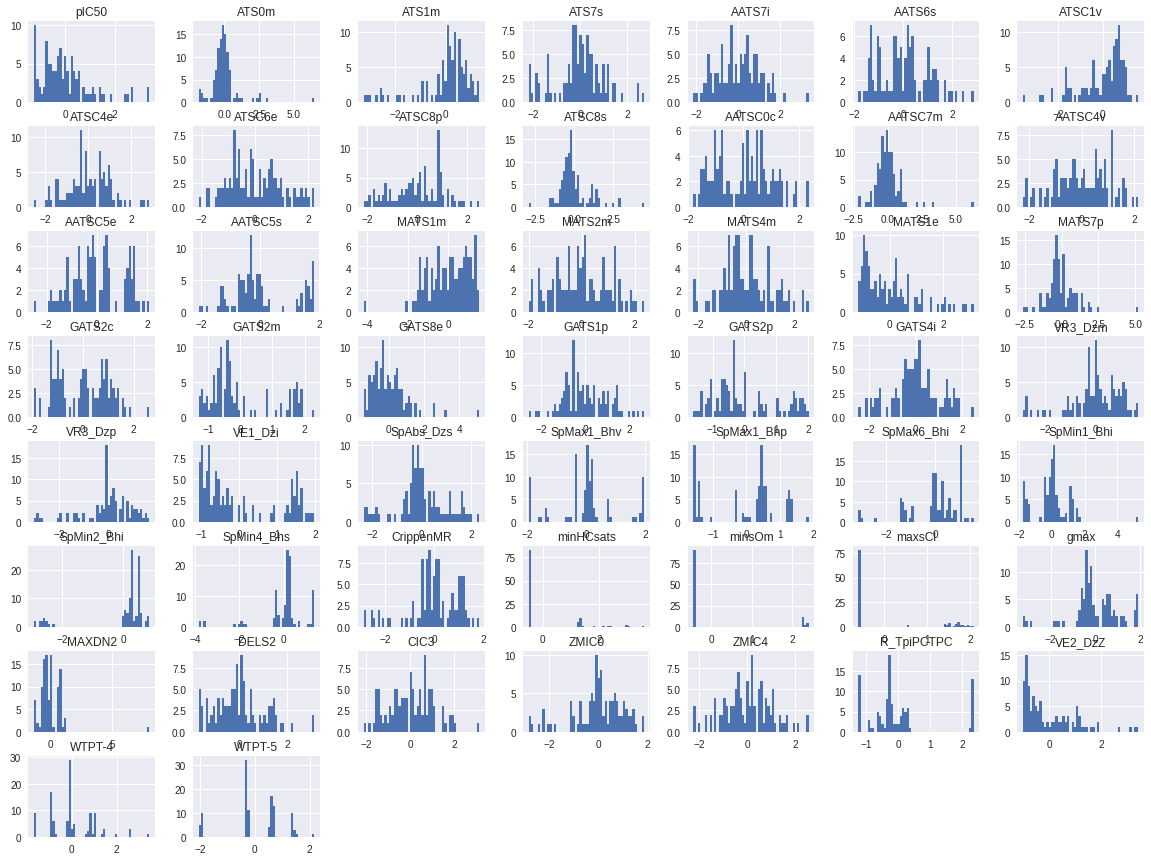

In [ ]:
df2_sc.hist(bins = 50, figsize=(20,15))
plt.show()

** Initiation of Support Vector Regressor**

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
model.fit(X_train, Y_train)

GradientBoostingRegressor()

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
print(Y_train_pred)

[ 0.35656647 -0.58863016 -0.42028717 -0.56923907  0.39846957 -0.63258664
  2.46751604 -0.06393526 -1.25451902 -1.26490538  0.15307864  0.23738346
 -0.66264599 -0.79808816 -0.9786703   0.41261568 -0.32321701  0.77554764
 -1.24520258 -0.16845195 -0.51925792  2.41244636 -1.26781959 -0.4299277
 -0.71167636 -0.732013    1.47388524  0.97121374 -0.1955726  -0.43153559
 -0.76747719 -0.79428738 -0.3706877   0.83704061 -0.43728084  0.51862392
 -0.96550061 -0.54197639  1.39418112 -0.16845195 -0.30760608 -1.16191154
 -0.43457948  1.04442915 -0.23250155 -1.26385879 -0.19769169  0.77665652
 -0.02284726 -0.0799728   0.23778529  0.1084339   0.06947379 -1.25838204
  0.00684123  0.06909137 -0.71199744  3.38666728  1.17177624  0.06172181
  0.21721797  2.65297828  0.44154517  1.51377348 -1.2486896   0.25951573
 -0.68622267  2.70992358 -1.10853973  0.88520161 -0.4470559  -1.04473376
 -1.07747415 -1.25096819 -0.76747719 -0.03227436 -1.25757053  1.868647
 -0.20998445  0.55957518 -0.05035826  0.34902525 -0.19

In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
predictions1

,Y_train,Y_train_pred
67,0.360448,0.356566
26,-0.615563,-0.588630
22,-0.410117,-0.420287
31,-0.577801,-0.569239
56,0.382279,0.398470
...,...,...
71,-0.098797,-0.050358
14,0.329546,0.349025
92,-0.135998,-0.195643
51,0.245356,0.266935


In [ ]:
len(Y_train_pred)

85

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 0.9994


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.0201


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.0256


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 0.9994


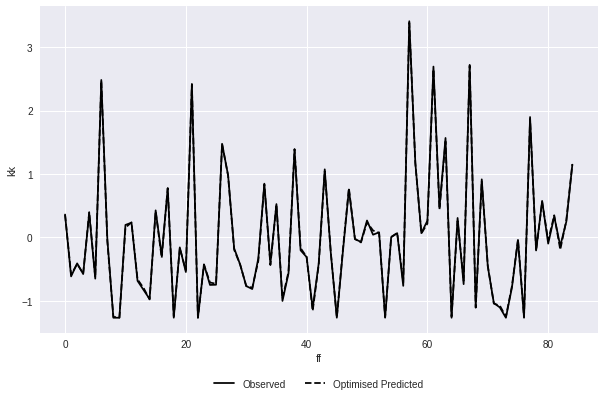

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([ 0.06266586, -0.54944128, -0.27737956,  0.30086752, -0.05389733,
        1.03491845, -0.50441222, -0.21582241,  1.15718175, -0.39283412,
        0.10256207, -0.20448999, -0.95744397, -1.26217178, -0.79735564,
        0.97121374,  0.24531423,  0.21369493,  0.36753921, -0.3001856 ,
       -0.18349835, -0.4473344 ])

In [ ]:
len(Y_test_pred)

22

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

,Y_test,Y_test_pred
76,0.236934,0.062666
10,-0.355840,-0.549441
4,-0.201312,-0.277380
99,-0.779144,0.300868
70,-0.231219,-0.053897
66,0.556590,1.034918
30,-0.717109,-0.504412
45,-0.608406,-0.215822
94,3.381814,1.157182
11,0.045625,-0.392834


In [ ]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: 0.5077


In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: 0.5077


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 0.4553


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 0.6573


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))


The EVS is: 0.5155


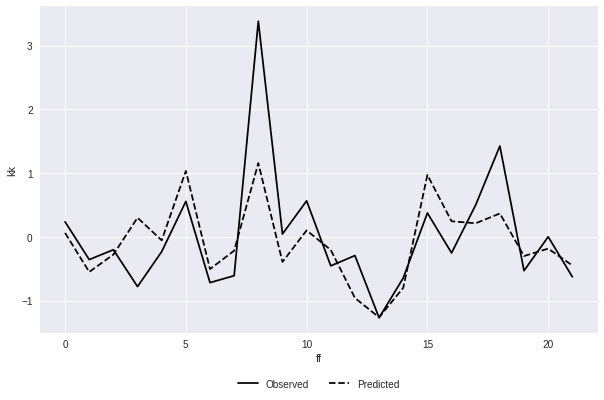

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

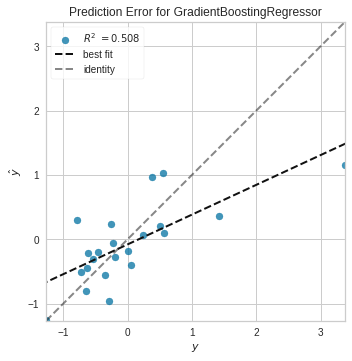

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

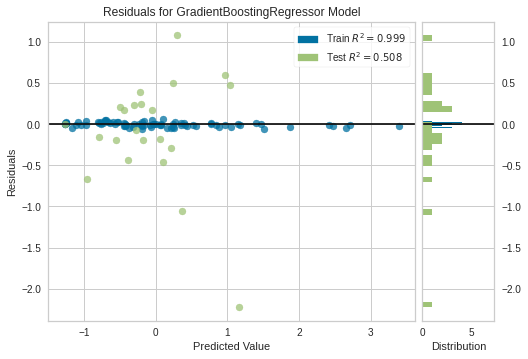

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

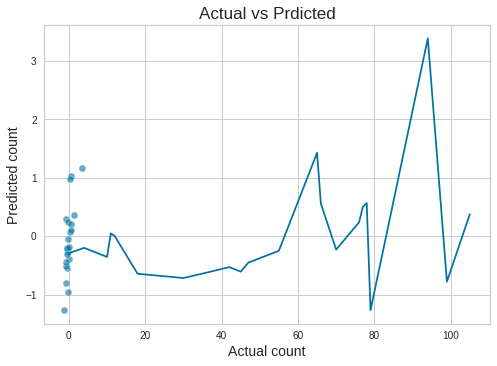

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Prdicted', fontsize = 17)
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.5076726732752057

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.66

**Using Different Hyperparametere**

In [ ]:
my_param_grid = {'n_estimators':[250,450,650], 'max_depth':[6,7,8], 'min_samples_leaf': [3,4,5]} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [250, 450, 650]},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=6, min_samples_leaf=3, n_estimators=250;, score=0.136 total time=   0.6s
[CV 2/5] END max_depth=6, min_samples_leaf=3, n_estimators=250;, score=0.532 total time=   0.6s
[CV 3/5] END max_depth=6, min_samples_leaf=3, n_estimators=250;, score=0.714 total time=   0.5s
[CV 4/5] END max_depth=6, min_samples_leaf=3, n_estimators=250;, score=0.164 total time=   0.4s
[CV 5/5] END max_depth=6, min_samples_leaf=3, n_estimators=250;, score=0.048 total time=   0.4s
[CV 1/5] END max_depth=6, min_samples_leaf=3, n_estimators=450;, score=0.182 total time=   0.8s
[CV 2/5] END max_depth=6, min_samples_leaf=3, n_estimators=450;, score=0.522 total time=   0.8s
[CV 3/5] END max_depth=6, min_samples_leaf=3, n_estimators=450;, score=0.718 total time=   0.8s
[CV 4/5] END max_depth=6, min_samples_leaf=3, n_estimators=450;, score=0.165 total time=   0.8s
[CV 5/5] END max_depth=6, min_samples_leaf=3, n_estimators=450;, score=0.0

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [250, 450, 650]},
             verbose=3)

In [ ]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 450}

**Test with Hyperparameters**

In [ ]:
Y_test_optimised = grid.predict(X_test)

In [ ]:
Y_test_optimised

array([ 0.03957158, -0.50480594, -0.0363569 , -0.04171915,  0.01426556,
        0.76706303, -0.46138802, -0.21063749,  1.57733517, -0.50100936,
        0.15777694, -0.0280077 , -1.03685448, -1.29998506, -0.53032093,
        0.97808295,  0.15789211,  0.41436214,  0.30562678, -0.63633654,
       -0.1229384 , -0.51875682])

In [ ]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

,Y_test,Y_test_pred,Y_test_optimised
76,0.236934,0.062666,0.039572
10,-0.355840,-0.549441,-0.504806
4,-0.201312,-0.277380,-0.036357
99,-0.779144,0.300868,-0.041719
70,-0.231219,-0.053897,0.014266


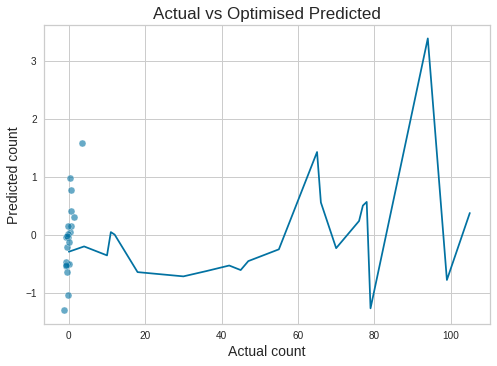

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
grid.score(X_test, Y_test)

0.6239410785078194

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.57

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The training r_sq is: 0.9164


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 0.4087


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 0.5745


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: 0.6303


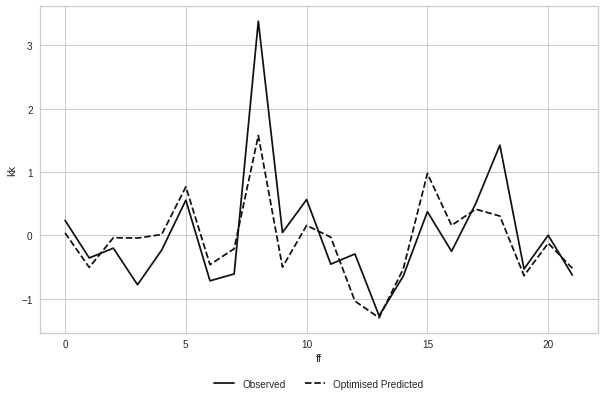

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

**Train with hyperparameters**

In [ ]:
Y_train_optimised = grid.predict(X_train)

In [ ]:
Y_train_optimised

array([ 3.60456544e-01, -6.15558235e-01, -4.10116918e-01, -5.77806778e-01,
        3.82321345e-01, -6.51538342e-01,  2.48308103e+00, -2.45309333e-02,
       -1.26765066e+00, -1.26763707e+00,  1.96491922e-01,  2.31973334e-01,
       -6.85187535e-01, -8.29268515e-01, -9.71738508e-01,  4.26649936e-01,
       -2.90035414e-01,  7.76160872e-01, -1.26763240e+00, -1.80713841e-01,
       -5.46754918e-01,  2.41908701e+00, -1.26761782e+00, -4.26309056e-01,
       -7.50339331e-01, -7.47214822e-01,  1.47688748e+00,  9.78082949e-01,
       -1.72061323e-01, -4.30504563e-01, -7.79053829e-01, -8.15010909e-01,
       -3.30220010e-01,  8.47486500e-01, -4.14570906e-01,  5.25703126e-01,
       -1.00288605e+00, -5.68182490e-01,  1.38310268e+00, -1.80713841e-01,
       -3.10743793e-01, -1.12142328e+00, -4.13141075e-01,  1.07383392e+00,
       -2.40853529e-01, -1.26755876e+00, -2.30348208e-01,  7.55678772e-01,
       -2.79699200e-02, -7.07604703e-02,  2.66089408e-01,  4.19299997e-02,
        8.03305681e-02, -

In [ ]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1.head()

,Y_train,Y_train_pred,Y_train_optimised
67,0.360448,0.356566,0.360457
26,-0.615563,-0.588630,-0.615558
22,-0.410117,-0.420287,-0.410117
31,-0.577801,-0.569239,-0.577807
56,0.382279,0.398470,0.382321


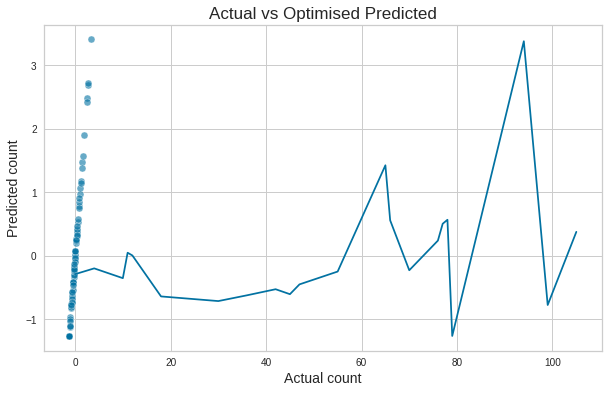

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.9994


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 0.0008


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 0.0039


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 1.0000


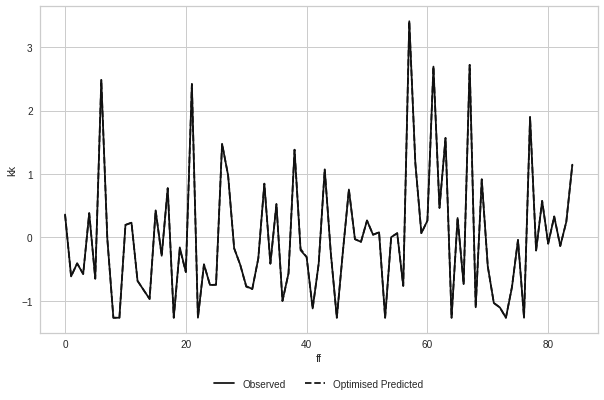

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)